In [27]:
import pandas as pd
import numpy as np
import re
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

In [2]:
data = pd.read_excel("data_alex.xlsx")

In [3]:
data.head()

,USERNAME,FOLLOWERS,FOLLOWING,LIKES,COMMENTS,TEXT,NUMBER OF TAGS,LIST OF TAGS,DATE,"DAY(0 MONDAY,6 SUNDAY)",...,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39
0,georgiou82,1134619,915,18560,95,Every day is a #newday and every experience is...,2,#newera#newday,2017-02-11 11:05:10,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,georgiou82,1134619,915,17710,86,#goodnight !!! The #weekend is ahead!!! Have a...,3,#goodnight#goodone#weekend,2017-02-11 00:33:10,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,georgiou82,1134619,915,11959,79,#tb #2007 #stous31dromous #megatv #greece #new...,7,#tb#memories#greece#stous31dromous#newyork#200...,2017-02-09 15:51:47,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,georgiou82,1134619,915,13608,37,Cold weather brings people together.... #filmi...,2,#mprousko4#filming,2017-02-08 18:21:57,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,georgiou82,1134619,915,15842,62,The youngest hearts might be the oldest souls....,4,#peru#lifelessons#tb#andreasgeorgiou✔️,2017-02-08 13:03:14,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
data['TEXT'][3456]

"? Meanwhile in magical Mykonos. There's no place like Greece. Photo by @robertoderosa #mykonos #greece #hellas #greek #greeks #greeklife #greekgirl #greekislands"

In [5]:
data['LIST OF TAGS'][9]

'#actor#onset#newtvseries#tv'

In [6]:
emoji_regexp = u'[\U00002600-\U000026FF]|[\U00002700-\U000027BF]|[\U0001f300-\U0001f5fF]|[\U0001f600-\U0001f64F]|' \
               u'[\U0001f680-\U0001f6FF]|[\U00002A00-\U00002AFF]|[\U0001F1E0-\U0001F1FF]'
re.findall(emoji_regexp, data['TEXT'][170], re.UNICODE)

[]

In [7]:
text = data['TEXT'][17806]
print(text) # with emoji

emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002700-\U000027BF"
        u"\U00002A00-\U00002AFF"
        u"\U00002600-\U000026FF"
                           "]+", flags=re.UNICODE)
print(emoji_pattern.sub(r'', text)) # no emoji

#Zetas #ZetaPhiBeta #FinerWomen #Finer #FinerWomanhood#ZPhiB1920 #ZPhiB97From @dgparaco - Yes Sorors!???#ThisIsAREPOST:???#REPOSTEDBY: @4evahaka #FAMU_1908???
#Zetas #ZetaPhiBeta #FinerWomen #Finer #FinerWomanhood#ZPhiB1920 #ZPhiB97From @dgparaco - Yes Sorors!???#ThisIsAREPOST:???#REPOSTEDBY: @4evahaka #FAMU_1908???


# Post Description

In [13]:
data['TEXT'][6666]

'Cucci ✅?'

In [14]:
letters_only = re.sub("[^a-zA-Z]",           # The pattern to search for
                      " ",                   # The pattern to replace it with
                      data['TEXT'][6666]) 

In [15]:
letters_only

'Cucci   '

In [16]:
lower_case = letters_only.lower()        # Convert to lower case
words = lower_case.split()               # Split into words
words

['cucci']

In [17]:
from nltk.corpus import stopwords
words = [w for w in words if not w in stopwords.words("english")]
words

['cucci']

In [18]:
" ".join(words)

'cucci'

In [19]:
def cleanup(sentence):
    #letters_only = re.sub("[^a-zA-Z]", " ", sentence.split(', ')[0])
    #emojis = re.findall(emoji_regexp, sentence.split(', ')[0], re.UNICODE)
    try:
        letters_only = re.sub("[^a-zA-Z]", " ", sentence)
        emojis = re.findall(emoji_regexp, sentence, re.UNICODE)
    except:
        letters_only = ''
        emojis = []
    words = letters_only.lower().split()        
    words = [w for w in words if not w in stopwords.words("english")]
    words = [w for w in words if len(w) > 1]
    return (" ".join(words)), (" ".join(emojis))

In [20]:
sentence, emojis = cleanup(data['TEXT'][9])

In [21]:
sentence

'great meetings great people welcome family pavlidou sofia newtvseries tv onset actor'

In [22]:
emojis

''

In [23]:
data['TEXT'].size

30000

In [19]:
clean = []
clean_emojis = []
for i in range( 0, data['TEXT'].size ):
    if( (i+1)%1000 == 0 ):
        print(str(round(i/30000*100))+"% done")
    x,y = cleanup(data['TEXT'][i])
    clean.append(x)
    clean_emojis.append(y)

3% done
7% done
10% done
13% done
17% done
20% done
23% done
27% done
30% done
33% done
37% done
40% done
43% done
47% done
50% done
53% done
57% done
60% done
63% done
67% done
70% done
73% done
77% done
80% done
83% done
87% done
90% done
93% done
97% done
100% done


In [20]:
len(clean_emojis)

30000

In [91]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
 
clean_vectorizer = CountVectorizer(analyzer = "word", tokenizer = None, preprocessor = None, stop_words = None, max_features = 250) 

# fit_transform() does two functions: First, it fits the model
# and learns the vocabulary; second, it transforms our training data
# into feature vectors. The input to fit_transform should be a list of 
# strings.
clean_features = clean_vectorizer.fit_transform(clean)

#tfidf_transformer = TfidfTransformer()
#clean_features = tfidf_transformer.fit_transform(clean_features)

# Numpy arrays are easy to work with, so convert the result to an 
# array
clean_features = clean_features.toarray()

In [92]:
clean_features.shape

(30000, 250)

In [93]:
vocab = clean_vectorizer.get_feature_names()
print(vocab)

['actor', 'aka', 'akas', 'alphakappaalpha', 'alphaphialpha', 'alphatv', 'always', 'amazing', 'anime', 'animeboy', 'animegirl', 'animelife', 'ant', 'aphia', 'apisteuta', 'april', 'art', 'artist', 'athens', 'athensvoice', 'back', 'backstage', 'beach', 'beautiful', 'beauty', 'best', 'bio', 'black', 'blogger', 'blue', 'boruto', 'burak', 'burakozcivit', 'city', 'collection', 'com', 'cosplay', 'credits', 'crescent', 'cute', 'day', 'de', 'design', 'details', 'direct', 'dress', 'easter', 'ellada', 'europe', 'fab', 'fabulous', 'facebook', 'family', 'famu', 'fashion', 'fashionblogger', 'fashiongram', 'fashionista', 'firearms', 'fitness', 'follow', 'followme', 'food', 'friends', 'fun', 'funny', 'get', 'girl', 'go', 'godly', 'good', 'goodmorning', 'gr', 'great', 'greece', 'greecestagram', 'greek', 'greeklife', 'greekpost', 'greekposts', 'greekquote', 'greekquotes', 'greeks', 'gunporn', 'guns', 'hair', 'handmade', 'happy', 'happyeaster', 'heels', 'hellas', 'hinata', 'hokage', 'home', 'https', 'ig',

In [24]:
from collections import Counter
from sklearn.feature_extraction import DictVectorizer
clean_emojis_vectorizer = DictVectorizer()
#description_emojis_vectorizer = CountVectorizer() 

# fit_transform() does two functions: First, it fits the model
# and learns the vocabulary; second, it transforms our training data
# into feature vectors. The input to fit_transform should be a list of 
# strings.
#X = description_vectorizer.fit(emojis)
#clean_description_emojis_features = description_vectorizer.transform(clean_description_emojis)
X = clean_emojis_vectorizer.fit_transform(Counter(s.split()) for s in clean_emojis)

# Numpy arrays are easy to work with, so convert the result to an 
# array
clean_emojis_features = X.toarray()

In [25]:
clean_emojis_features.shape

(30000, 153)

# Hashtags

In [26]:
#data['tags'][0][1:-1].split(', ')[23][2:-1]
data['LIST OF TAGS'][0]

'#newera#newday'

In [27]:
sentence, emojis = cleanup(data['LIST OF TAGS'][0])

In [28]:
sentence

'newera newday'

In [29]:
emojis

''

In [30]:
clean_tag = []
clean_tag_emojis = []
for i in range( 0, data['LIST OF TAGS'].size ):
    if( (i+1)%1000 == 0 ):
        print(str(round(i/30000*100))+"% done")
    x,y = cleanup(data['LIST OF TAGS'][i])
    if len(y) > 0:
        print('yes')
    clean_tag.append(x)
    clean_tag_emojis.append(y)

yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
3% done
yes
yes
yes
yes
7% done
10% done
yes
yes
13% done
yes
17% done
20% done
23% done
27% done
30% done
33% done
37% done
40% done
43% done
47% done
50% done
53% done
57% done
60% done
63% done
67% done
70% done
73% done
77% done
80% done
83% done
87% done
90% done
93% done
97% done
100% done


In [31]:
clean_tag

['newera newday',
 'goodnight goodone weekend',
 'tb memories greece stous dromous newyork megatv',
 'mprousko filming',
 'peru lifelessons tb andreasgeorgiou',
 'love andreasgeorgiou',
 'work progress andreasgeorgiou',
 'dayout lovehim crazy godson',
 'andreasgeorgiou quoteoftheday',
 'actor onset newtvseries tv',
 'filming onset cyprus mprousko',
 'music soundtrack tvseries',
 'directing onset lovemyjob tvseries',
 'directorassistant hasmyback tvseries friends loveher coworkers',
 'travel amsterdam backstage filming europe mprousko',
 'fridaynight athens greece morningshoot earlynight',
 'moodofday positive ambition',
 'andreasgeorgiou photoshoot magazine',
 'andreasgeorgiou olaksekolla tvshow ola tvshow',
 'olatvshow themos olaksekolla',
 'sister brother qualitytime familymoments',
 'happynewyear',
 'andreasgeorgiou fb',
 'soon christmas lovey mprousko',
 'mprousko amsterdam',
 'amsterdam',
 'weekend athens bro',
 'didymafeggaria',
 'feelingstupid',
 'ilovemyjob',
 '',
 'mprousko',


In [32]:
clean_tag_vectorizer = CountVectorizer(analyzer = "word", tokenizer = None, preprocessor = None, stop_words = None, max_features = 250) 
clean_tag_features = clean_tag_vectorizer.fit_transform(clean_tag)
clean_tag_features = clean_tag_features.toarray()
clean_tag_features.shape

(30000, 250)

In [33]:
vocab = clean_tag_vectorizer.get_feature_names()
print(vocab)

['acp', 'acropolis', 'actor', 'actorslife', 'actress', 'actresslife', 'aj', 'alphatv', 'amazing', 'ammo', 'amphictyonyofancientgreekcities', 'andreasgeorgiou', 'ant', 'armaswords', 'arms', 'ataka', 'atakes', 'athens', 'avraquotes', 'backstage', 'basilisavramidis', 'beautiful', 'beauty', 'bestoftheday', 'blogger', 'bloggerlife', 'brusko', 'bsbfashion', 'celebrities', 'celebritiesnews', 'champions', 'coffee', 'comingsoon', 'cosmopoliti', 'crueltyfree', 'cute', 'cyprus', 'daddysboy', 'dailybadass', 'dancegr', 'dancelikeeveryoneiswatching', 'day', 'despinavandicollection', 'director', 'dog', 'easter', 'eleni', 'elenimenegaki', 'enjoy', 'europe', 'evita', 'evitagreece', 'family', 'fans', 'fashion', 'fashionblogger', 'fashionista', 'filming', 'final', 'firearmlove', 'firearms', 'firempotography', 'follow', 'followme', 'food', 'foodporn', 'football', 'friends', 'friendship', 'fthis', 'fun', 'girl', 'glock', 'goodmorning', 'greece', 'greek', 'greekcup', 'greekeaster', 'greekgirl', 'greekisland

# Username

In [24]:
sentence, emojis = cleanup(data['USERNAME'][0])
sentence

'georgiou'

In [25]:
clean_name = []
clean_name_emojis = []
for i in range( 0, data['USERNAME'].size ):
    if( (i+1)%1000 == 0 ):
        print(str(round(i/30000*100))+"% done")
    x,y = cleanup(data['USERNAME'][i])
    if len(y) > 0:
        print('yes')
    clean_name.append(x)
    clean_name_emojis.append(y)

3% done
7% done
10% done
13% done
17% done
20% done
23% done
27% done
30% done
33% done
37% done
40% done
43% done
47% done
50% done
53% done
57% done
60% done
63% done
67% done
70% done
73% done
77% done
80% done
83% done
87% done
90% done
93% done
97% done
100% done


In [28]:
clean_name_vectorizer = CountVectorizer(analyzer = "word", tokenizer = None, preprocessor = None, stop_words = None, max_features = None) 
clean_name_features = clean_name_vectorizer.fit_transform(clean_name)
clean_name_features = clean_name_features.toarray()
clean_name_features.shape

(30000, 2139)

In [30]:
name = pd.DataFrame(clean_name_features)

In [32]:
name.to_csv('name_ecoding.csv')

# XGB model

In [132]:
#dataset1 = np.hstack((clean_places_features,clean_mentions_features,clean_tag_features,clean_user_features,clean_features))
dataset1 = np.hstack((clean_tag_features, clean_features, clean_name_features))
dataset2 = np.hstack((data.FOLLOWERS.as_matrix().reshape(30000,1), data.FOLLOWING.as_matrix().reshape(30000,1)))

In [133]:
dataset1.shape

(30000, 2639)

In [134]:
dataset = np.hstack((dataset1,dataset2))
#dataset = np.hstack((clean_features,dataset2))

In [135]:
dataset.shape

(30000, 2641)

In [136]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

In [110]:
parameters = {
            'max_depth':[3], 
            'learning_rate':[0.48], 
            'n_estimators':[361]
         }
xg = GridSearchCV(xgb.XGBRegressor(), parameters, cv = 5, scoring = 'neg_mean_squared_error', verbose=100)

In [138]:
y = np.ravel(data.LIKES)

In [111]:
xg.fit(dataset, y)
xg.best_score_

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] learning_rate=0.48, max_depth=3, n_estimators=361 ...............
[CV]  learning_rate=0.48, max_depth=3, n_estimators=361, score=-82469126.996916, total=  26.9s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   27.2s remaining:    0.0s
[CV] learning_rate=0.48, max_depth=3, n_estimators=361 ...............
[CV]  learning_rate=0.48, max_depth=3, n_estimators=361, score=-3758911.423817, total=  27.1s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   54.6s remaining:    0.0s
[CV] learning_rate=0.48, max_depth=3, n_estimators=361 ...............
[CV]  learning_rate=0.48, max_depth=3, n_estimators=361, score=-1956970.835891, total=  27.1s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  1.4min remaining:    0.0s
[CV] learning_rate=0.48, max_depth=3, n_estimators=361 ...............
[CV]  learning_rate=0.48, max_depth=3, n_estimators=361, score=-939841.810343, total=  32.4s
[Parallel(n_jobs=1)]: Done   4 out of   4

-18292231.017607376

In [45]:
from sklearn.model_selection import cross_val_score
model = xgb.XGBRegressor()
scores = cross_val_score(model, dataset, y, cv=5, scoring = 'neg_mean_squared_error')
np.mean(scores)

-19013439.238583818

In [46]:
from sklearn.cross_validation import train_test_split

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [139]:
x_train, x_test, y_train, y_test = train_test_split(dataset, y, test_size=0.2, random_state=42)

In [140]:
model = xgb.XGBRegressor()
model.fit(x_train, y_train)

XGBRegressor(base_score=0.5, colsample_bylevel=1, colsample_bytree=1, gamma=0,
       learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=100, nthread=-1,
       objective='reg:linear', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1)

In [141]:
model.score(x_test,y_test)

0.83084993272542063

In [142]:
testing = model.predict(x_test)

In [143]:
testing[100]

665.88885

In [144]:
y_test[100]

523

In [145]:
sum(np.ravel(data.LIKES))/30000

1855.4263333333333

In [146]:
data.describe()

,FOLLOWERS,FOLLOWING,LIKES,COMMENTS,Unnamed: 36
count,3.000000e+04,30000.000000,30000.000000,30000.000000,1.0
mean,4.710864e+04,1578.273900,1855.426333,30.686433,1.0
std,8.747479e+04,2274.147597,4403.028595,379.812291,NaN
min,1.219200e+04,0.000000,0.000000,0.000000,1.0
25%,1.637100e+04,177.000000,293.000000,1.000000,1.0
50%,2.407300e+04,547.000000,750.000000,4.000000,1.0
75%,4.709100e+04,1588.000000,1850.250000,13.000000,1.0
max,1.134619e+06,7918.000000,143670.000000,25904.000000,1.0


In [147]:
from sklearn.metrics import mean_squared_error
model_xgb = xgb.XGBRegressor(max_depth=3, learning_rate=0.48, n_estimators=361)
model_xgb.fit(x_train, y_train)
y_pred = model_xgb.predict(x_test)
RMSE = mean_squared_error(y_test, y_pred)**0.5
print(RMSE)

1420.68772282


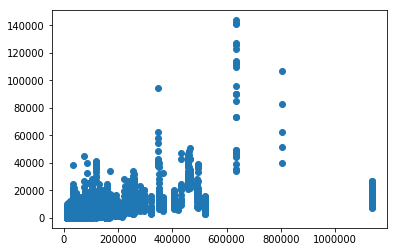

In [152]:
import matplotlib.pyplot as plt
plt.scatter(data['FOLLOWERS'],data['LIKES'])
plt.show()

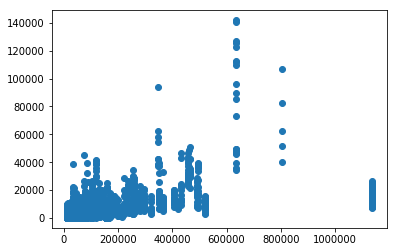

In [156]:
plt.scatter(x_train[:, [2639]], y_train)
plt.show()

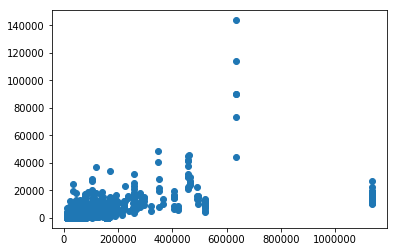

In [157]:
plt.scatter(x_test[:, [2639]], y_test)
plt.show()

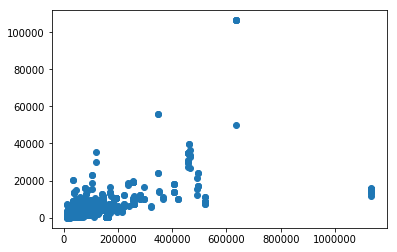

In [158]:
plt.scatter(x_test[:, [2639]], y_pred)
plt.show()